In [1]:
import io
import os
import glob
import json
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
# Imports the Google Cloud client library
from google.cloud import vision

In [2]:
client = vision.ImageAnnotatorClient()

## Try it !

In [3]:
f = "data/000000.jpg"

In [4]:
with io.open(f, 'rb') as image_file:
    content = image_file.read()
    image = vision.Image(content=content)
    objects = client.object_localization(image=image).localized_object_annotations

In [5]:
objects

[mid: "/m/083wq"
name: "Wheel"
score: 0.928115725517273
bounding_poly {
  normalized_vertices {
    x: 0.6355584263801575
    y: 0.7378100752830505
  }
  normalized_vertices {
    x: 0.7984187602996826
    y: 0.7378100752830505
  }
  normalized_vertices {
    x: 0.7984187602996826
    y: 0.8811611533164978
  }
  normalized_vertices {
    x: 0.6355584263801575
    y: 0.8811611533164978
  }
}
, mid: "/m/0k4j"
name: "Car"
score: 0.8999678492546082
bounding_poly {
  normalized_vertices {
    x: 0.3878369629383087
    y: 0.5028000473976135
  }
  normalized_vertices {
    x: 0.9961247444152832
    y: 0.5028000473976135
  }
  normalized_vertices {
    x: 0.9961247444152832
    y: 0.8789884448051453
  }
  normalized_vertices {
    x: 0.3878369629383087
    y: 0.8789884448051453
  }
}
, mid: "/m/0k4j"
name: "Car"
score: 0.8325610756874084
bounding_poly {
  normalized_vertices {
    x: 0.08968394994735718
    y: 0.41040459275245667
  }
  normalized_vertices {
    x: 0.2731561064720154
    y: 0.4

Wheel
650.8118286132812 755.5175170898438 166.76898193359375 146.79150390625
Car
397.1450500488281 514.8672485351562 622.8866882324219 385.2169189453125
Car
91.83636474609375 420.2543029785156 187.87548828125 115.47708129882812
Umbrella
590.9243774414062 445.6064453125 121.0791015625 95.71514892578125
Building
652.7110595703125 9.064132690429688 366.6505126953125 539.5453033447266
Umbrella
828.494873046875 447.2308044433594 161.96405029296875 66.10421752929688
Building
122.32009887695312 0.0 202.80300903320312 419.1629333496094
Building
318.0045166015625 7.375000476837158 147.57644653320312 405.53063917160034
Person
586.9382934570312 447.1842041015625 130.7860107421875 94.01519775390625
Person
821.8023071289062 561.6741333007812 160.61053466796875 92.24261474609375


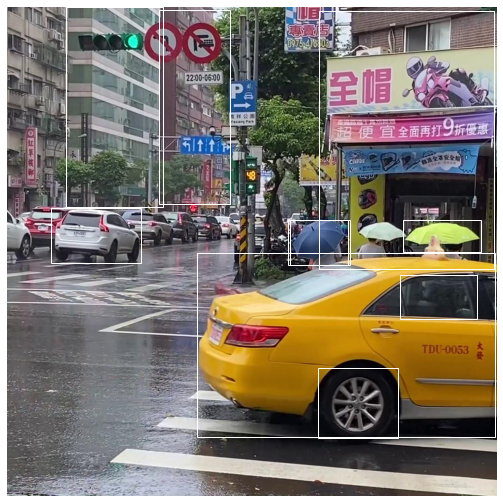

In [6]:
img = Image.open(f)
ww, hh = img.size

fig = plt.figure()
fig.set_size_inches(12, 9)
plt.imshow(img)
plt.axis("off")
ax = plt.gca()
for o in objects:
    print(o.name)
    x = ww * o.bounding_poly.normalized_vertices[0].x 
    y = hh * o.bounding_poly.normalized_vertices[0].y
    w = ww * (o.bounding_poly.normalized_vertices[1].x - o.bounding_poly.normalized_vertices[0].x)
    h = hh * (o.bounding_poly.normalized_vertices[2].y - o.bounding_poly.normalized_vertices[1].y)
    print(x, y, w, h)
    rect = Rectangle((x, y), w, h, linewidth=1, edgecolor='w', facecolor='none')
    ax.add_patch(rect)
plt.show()


## Start to write json files

In [8]:
first_data = 0
last_data = 10

In [9]:
for i in range(first_data, last_data+1):
    with io.open("data/{}.jpg".format(str(i).zfill(6)), 'rb') as image_file:
        content = image_file.read()
        image = vision.Image(content=content)
        objects = client.object_localization(image=image).localized_object_annotations
    
    with open("json_files/{}.json".format(str(i).zfill(6)), 'w', encoding='utf-8') as json_file:
        all_data = []
        for obj in objects:
            bounding_poly = []
            for val in obj.bounding_poly.normalized_vertices:
                bounding_poly.append({'x': val.x, 'y': val.y})

            data = {'name': obj.name,
                    'score': obj.score,
                    'bounding_poly': bounding_poly,
                    'credit': ""
                   }
            all_data.append(data)

        json.dump(all_data, json_file)